<a href="https://colab.research.google.com/github/alexanderwhatley/TCR-Pathogen-Identification/blob/master/benchmark_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install serializable
!pip install mhcflurry
!pip install --no-cache-dir --force-reinstall --no-deps git+https://github.com/alexanderwhatley/pepnet
!pip install pepdata
!pip install biopython 
!mhcflurry-downloads fetch models_class1
!pip install editdistance

     |████████████████████████████████| 81kB 3.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/57/ea/39/77dbaca2061ba8e87ad8b83ead5814467fb0d748d1d9f1d77d
  Stored in directory: /root/.cache/pip/wheels/27/ad/82/4a9bbc88f1d31bb1a0c053e29efafc02f56e2ed1598f5639b2
  Stored in directory: /root/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built serializable typechecks simplejson
     |████████████████████████████████| 61kB 2.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/54/95/d2/82cc640ebfa34005cc59ae86ed1dd89a4184d8286485d7c39a
  Stored in directory: /root/.cache/pip/wheels/8a/a6/b0/a27614ca44aeab955ddb7c9f14fa733d6462fdc86b1fed40d9
Successfully built mhcflurry mhcnames
  Cloning https://github.com/alexanderwhatley/pepnet to /tmp/pip-req-build-9u22rj0c
  Running command git clone -q https://github.com/alexanderwhatley/pepnet /tmp/pip-req-build-9u22rj0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-iwakygct/wheels/b8/6e/41/5455

In [2]:
# Read in all necessary files 
import io
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

def download_file(name, file_id):
    drive_service = build('drive', 'v3')
    request = drive_service.files().get_media(fileId=file_id)
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    done = False
    while done is False:
      status, done = downloader.next_chunk()
      print('Percent downloaded', int(100 * status.progress()))
    downloaded.seek(0)
    f = open(name, 'wb')
    f.write(downloaded.read())
    f.close()

download_file('vdjdb_data.tsv', '1Vzpw6hprVQjRbmM6wZXMeY3HQW-OuXlY')
download_file('sequences_combined.csv', '1X-LxheImPHtb-oH9hUn46kmOcwYJoXXf')
download_file('sequences_combined.fasta', '1sTJ48PGK-QRm0JrWm7uhfMK4s18uVgW5')
download_file('HIV.fasta', '1CDF0gCTBTYvjZXN8iGRo-sfy7QuONOdz')
download_file('HPV.fasta', '1-TjGSeWk2OSd7fIjGaWtjGRXV0GJBRHE')
download_file('Influenza.fasta', '1tD8Jro2e4n8uWudEJCqPXc61SmTsUlBh')
download_file('Japanese Encephalitis Virus.fasta', '1BxO_yWmepbro99gE_v6xNMhDbIZ3Gtaj')
download_file('HHV8.fasta', '19dQ4_w7KrJNSMb3bB_bM3Mk9f8gE7tiY')
download_file('Hepatitis A.fasta', '11wpCSWd1QFKyat6rNnslUSBCOe3I-ZAB')
download_file('Hepatitis B.fasta', '1I2Ok2Q0dwB9OjN8TxIo0mHcvhHacfVK8')
download_file('Hepatitis C.fasta', '1gIRF_95EQefBuBIT7NNDRoo7l54o9QGU')
download_file('Hepatitis E.fasta', '1KP4T_4mxm5qb51C9QUqyiDiE_SQZlLyx')
download_file('Measles.fasta', '1Evw1zekQDk7_19ivMa27eEpOO02zeXGP')
download_file('Rotavirus.fasta', '1Mrm-7dlqDhLjeuTAg_efTwkXE9FpW7Dx')
download_file('Norovirus.fasta', '1Y1QsowdgBoyyWg0S8H_SOxzLZTANLEym')
download_file('RSV.fasta', '1l3JoeY3ZVQAJZ6DAmdWQjWFkNRSXqHT7')
download_file('Dengue Virus.fasta', '1_JtXdF_1sr25KZWmT0YLo5UR7VbRbUG-')
download_file('Yellow Fever Virus.fasta', '1zEimcKA9LqUlc6K5yTzKSQcPkTHi2UFP')
download_file('Zika.fasta', '1t3f6HBjWDvUn6YJv33NFhfxaap0m9MrX')
download_file('Zaire Ebolavirus.fasta', '1jrlnDNH8YYxSmJX_HJpnwiVK1V63QDs3')
download_file('West Nile Virus.fasta', '1AQsYJ7lr-BdoJbDfDd8eRJvslH_wv9J1')
download_file('Varicella-zoster.fasta', '1Sq8BBEb80ZKxhwAAAvKSlOMlsuJYMwco')
download_file('SARS.fasta', '1yDW0hg9GZIE_jLNLmZljxeAw2B1NE6q0')
download_file('Rubella.fasta', '1zR6q3Aq1vsOH30czi_dTTArmy4c4RAmP')
download_file('Rabies.fasta', '1yddaOPdQnzt6nasqfJMh0RJRiKFXdGeq')
download_file('Poliovirus.fasta', '1FfsasN9WuqAMdXWY9uoHPY4_k247c7Nv')
download_file('Parvovirus B19.fasta', '1dh8_t_CocWC6XEpBzWWxV2rw5ZLrjKBv')
download_file('Mumps.fasta', '1z2MZPTXwdBXP5Du2KEbQ7_hawyk2_YGT')
download_file('Marburg.fasta', '1FXtAD7APAvcnTRSq190_2wVq3hfnIIwm')
download_file('Human adenovirus 11.fasta', '1LBqaQGNgN6EoypfAkst0Ipgnklu6eJ-x')
download_file('Coxsackievirus A16.fasta', '1MchLW1A_s9R2jTGCM5kVwXcKzGrTeHOa')
download_file('Chikungunya.fasta', '1zFpHl2dleziX9jDzXqR-lev7r2M2pfET')
download_file('HHV1.fasta', '14vhyZeRiYEkakXaoJnpD5KXfCxpzyWff')
download_file('HHV5.fasta', '1yBazVOx521QbxvgwNqmkOZ_CZub2cxW0')
download_file('Influenza H1N1.fasta', '1-PYC73BNTuBRNGEmiPfFahtS0YB39kW9')
download_file('Influenza H2N2.fasta', '1VP0GfJZqrmE-tb9dxHqYGo5erQ2ZoaYO')
download_file('Influenza H3N2.fasta', '1h77lI-UISOiJaiyiLyFpF1jZlJsfAndi')
download_file('Influenza H5N1.fasta', '1Bkml_0qDSxSzrLXX4a0Cy1db0Ck9GUvk')
download_file('Influenza H7N9.fasta', '1NA5tVtI3LadGVrNFctqPi3DBAeF8iKZG')

download_file('HCV Data Combined.xlsx', '10W4xXXx0TReNrQ-P1WoUfuzcW114NioY')
download_file('uniprot-filtered-reviewed-human.fasta', '1lRALwQInvWtdUpVsgSiZnEhuTPbZJX6B')
download_file('McPAS-TCR.csv', '19eV_s7h3ueFDl_FeE5D8fycd9oHhiBo-')
download_file('Master Legend.xlsx', '13JZZ71sArSc9N2rl_WTXrAS_ZucVETXs')
download_file('Experiment 1.xlsx', '1rW5wX0Gqj9vChT8YIncvYQWZi-1xk4NX')
download_file('Experiment 2.xlsx', '1XGfi66nN6U43ji9YGCMY4bVBJSkNZTTf')
download_file('Experiment 3.xlsx', '1oVPdrmHOSIAqRnfymWNRZ9f4APxt3XoC')
download_file('Experiment 4.xlsx', '1Nd5PugcdN7EqRRtyN0we_1kz9jyZBO5k')
download_file('Experiment 5.xlsx', '1yN4Ln47PCs--Rg50W8aq7UTOgorzv_Vp')
download_file('Experiment 6.xlsx', '17meqcDMKoHDqvzp6EFX2lWR_lfTB7uV7')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Percent downloaded 100
Per

In [3]:
# Build VDJDB model 
# Random Forest Model 
from collections import Counter, defaultdict
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.spatial.distance import hamming 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score
import editdistance
from pepnet.encoder import Encoder

encoder = Encoder()

# split data into training/validation by patient 
vdjdb_data = pd.read_csv('vdjdb_data.tsv', sep='\t')
vdjdb_data = vdjdb_data[vdjdb_data['Reference'] != 'PMID:28146579'] # exclude HCV data 
vdjdb_data = vdjdb_data[['CDR3', 'Epitope', 'Meta', 'Reference']] 
vdjdb_data = vdjdb_data[(vdjdb_data['CDR3'].str.len() <= 20) & 
                    (vdjdb_data['Epitope'].str.len() <= 11)]
vdjdb_data['Meta'] = vdjdb_data['Meta'].apply(lambda x: dict(json.loads(x)))
vdjdb_data['Subject_ID'] = vdjdb_data['Meta'].apply(lambda x: x['subject.id'])
num_blank_ids = vdjdb_data[vdjdb_data['Subject_ID'] == ''].shape[0]
vdjdb_data.loc[vdjdb_data['Subject_ID'] == '', 'Subject_ID'] = ['Patient ' + str(i + 10**6) for i in range(num_blank_ids)]
vdjdb_data_groupby = vdjdb_data.groupby(['Reference', 'Subject_ID']) # group corresponds to one patient 

np.random.seed(42)
prob_assigned = np.random.random(len(vdjdb_data_groupby))

def permute_patients():
  np.random.seed(42)
  train_data, train_labels, test_data, test_labels, train_patients, test_patients, train_cdr3, test_cdr3 = [], [], [], [], [], [], [], []
  ctr = 0
  for ind, group in vdjdb_data_groupby:
    prob_assign = prob_assigned[ctr]
    ctr += 1
    positive_cdr3 = encoder.encode_onehot(group['CDR3'].values, max_peptide_length=20)
    positive_epitopes = encoder.encode_onehot(group['Epitope'].values, max_peptide_length=11)
    combined_positive_peptides = np.concatenate((positive_cdr3, positive_epitopes), axis=1)
    for i in range(len(combined_positive_peptides)):
      if prob_assign < 0.2:
        test_data.append(combined_positive_peptides[i].ravel())
        test_labels.append(1)
        test_patients.append(ind)
        test_cdr3.extend(group['CDR3'].tolist())
      else:
        train_data.append(combined_positive_peptides[i].ravel())
        train_labels.append(1)
        train_patients.append(ind)
        train_cdr3.extend(group['CDR3'].tolist())
    binding_complex = set([(row['CDR3'], row['Epitope']) for _, row in group.iterrows()])
    cdr3_distinct, epitope_distinct = set(group['CDR3']), set(group['Epitope'])
    if ind[1] != '':
      for epitope in epitope_distinct:
        for cdr3 in cdr3_distinct:
          if (cdr3, epitope) not in binding_complex:
            negative_cdr3 = encoder.encode_onehot([cdr3], max_peptide_length=20)[0]
            negative_epitope = encoder.encode_onehot([epitope], max_peptide_length=11)[0]
            combined_negative_peptide = np.concatenate((negative_cdr3, negative_epitope))
            if prob_assign < 0.2:
              test_data.append(combined_negative_peptide.ravel())
              test_labels.append(0)
              test_patients.append(ind)
              test_cdr3.append(cdr3)
            else:
              train_data.append(combined_negative_peptide.ravel())
              train_labels.append(0)
              train_patients.append(ind)
              train_cdr3.append(cdr3)
            
  return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels), \
         train_patients, test_patients, train_cdr3, test_cdr3

vdjdb_train_data, vdjdb_train_labels, vdjdb_test_data, vdjdb_test_labels, \
train_patients, test_patients, train_cdr3, test_cdr3 = permute_patients()

all_vdjdb_train = np.concatenate((vdjdb_train_data, vdjdb_test_data))
all_vdjdb_labels = np.concatenate((vdjdb_train_labels, vdjdb_test_labels))

Using TensorFlow backend.


 A C D E F G H I K L M N P Q R S T V W Y
['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


Analyze pairwise Hamming distances between sequenced TCRs of the same patient to see if there are likely sequencing errors that cause some TCRs to be slightly different. As can be seen, all TCRs for the same patient are identical, so this is not an issue. 

In [0]:
# make plot of pairwise hamming distances between TCRs of the same patient, to check for sequencing errors 
patient_to_ind = defaultdict(list)
for ind, patient in enumerate(train_patients):
  patient_to_ind[patient].append(ind)

print('Number of patients', len(patient_to_ind))
distances = Counter()
for patient in patient_to_ind:
  inds = patient_to_ind[patient]
  for i in range(len(inds)):
    for j in range(i):
      tcr1 = train_cdr3[inds[i]]
      tcr2 = train_cdr3[inds[j]]
      dist = editdistance.eval(tcr1, tcr2)
      if dist > 0:
        distances[dist] += 1

plt.title('Edit distance between TCRs of the same patient')
plt.bar(range(1, 40+1), [distances[i] for i in range(1, 40+1)])
plt.show()

In [5]:
# train random forest model on VDJDB data 
import pickle 

print('Total samples', len(vdjdb_train_labels) + len(vdjdb_test_labels))
print('Positive samples', np.sum(vdjdb_train_labels == 1) + np.sum(vdjdb_test_labels == 1))
print('Negative samples', np.sum(vdjdb_train_labels == 0) + np.sum(vdjdb_test_labels == 0))
clf_vdjdb = RandomForestClassifier()
clf_vdjdb.fit(all_vdjdb_train, all_vdjdb_labels)
pickle.dump(clf_vdjdb, open('/content/gdrive/My Drive/TCR Epitope Identification/rf.pkl', 'wb'))

Total samples 23181
Positive samples 18199
Negative samples 4982


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# test combining VDJDB with TetraSeq
def clean_names(x):
  if x == 0 or pd.isnull(x):
    return x
  else:
    return x.replace('_', ' ').replace('-', ' ')

def prune_peptides(x, legend):
  if x == 0:
    return 0
  if x not in legend or pd.isnull(legend[x]):
    return 0
  x = legend[x]
  if len(x) > 11 or len(x) < 8:
    return 0
  return x
    

def process_experiment(file_name, legend_dict):
  print('Processing experiment', file_name)
  # process file and extract TCR-epitope data from it 
  legend = legend_dict[file_name]
  experiment = pd.read_excel(file_name + '.xlsx', skiprows=1)
  experiment = experiment[['Detected Peptide by MID Count', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 12']]
  experiment.columns = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5', 'CDR3']
  experiment = experiment.iloc[1:] # remove original column headers 
  experiment = experiment[experiment['CDR3'] != '']
  experiment = experiment[experiment['CDR3'].str.len() < 20]
  experiment[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']] = \
  experiment[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']].applymap(lambda x: clean_names(x))
  experiment[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']] = \
  experiment[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']].applymap(lambda x: prune_peptides(x, legend))
  distinct_peptides = set()
  for row in experiment[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']].values:
    for peptide in row:
      if peptide != 0:
        distinct_peptides.add(peptide)
  
  data = set()
  labels = []
  for _, row in experiment.iterrows():
    cdr3 = row['CDR3']
    peptides = []
    for peptide in row[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']]:
      if peptide != 0:
        peptides.append(peptide)
        if (cdr3, peptide) not in data:
          data.add((cdr3, peptide))
          labels.append(1)
    for peptide in distinct_peptides:
      if peptide not in peptides and ((cdr3, peptide) not in data):
        data.add((cdr3, peptide)) #Do any cdr3 sequences have multiple rows in one sheet?
        labels.append(0)
  
  encoded_data = []
  experiment_cdr3, experiment_peptides = [], []
  for cdr3, peptide in data:
    cdr3_encoded = encoder.encode_onehot([cdr3], max_peptide_length=20)[0].ravel()
    peptide_encoded = encoder.encode_onehot([peptide], max_peptide_length=11)[0].ravel()
    combined_encoded = np.concatenate((cdr3_encoded, peptide_encoded))
    encoded_data.append(combined_encoded)
    experiment_cdr3.append(cdr3)
    experiment_peptides.append(peptide)

  return np.array(encoded_data), np.array(labels), np.array(experiment_cdr3), np.array(experiment_peptides)

def process_all_experiments():
  master_legend = pd.read_excel('Master Legend.xlsx', skiprows=1)
  legend_dict = {}
  for i in range(6):
    experiment_cols = ['Experiment ' + str(i+1), 'Unnamed: ' + str(4*i+1), 'Unnamed: ' + str(4*i+2)]
    experiment_sub_df = master_legend[experiment_cols]
    experiment_sub_df.columns = ['Peptide Name', 'Sequence', 'Tetramer Fluorescence']
    experiment_sub_df = experiment_sub_df.iloc[1:]
    experiment_sub_df['Peptide Name'] = experiment_sub_df['Peptide Name'].apply(lambda x: clean_names(x))
    peptide_names = experiment_sub_df['Peptide Name'].values
    peptide_sequences = experiment_sub_df['Sequence'].values
    legend_dict['Experiment ' + str(i+1)] = dict(zip(peptide_names, peptide_sequences))

  experiment_dict = {}
  for i in range(6):
    experiment_dict['Experiment ' + str(i+1)] = process_experiment('Experiment ' + str(i+1), legend_dict)

  experiments = ['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']

  data = np.concatenate([experiment_dict[exp][0] for exp in experiments])
  labels = np.concatenate([experiment_dict[exp][1] for exp in experiments])
  cdr3 = np.concatenate([experiment_dict[exp][2] for exp in experiments])
  peptides = np.concatenate([experiment_dict[exp][3] for exp in experiments])
  
  return data, labels, cdr3, peptides

In [23]:
# train new model on combined data 
tetraseq_data, tetraseq_labels, tetraseq_cdr3, tetraseq_peptides = process_all_experiments()

Processing experiment Experiment 1
Processing experiment Experiment 2
Processing experiment Experiment 3
Processing experiment Experiment 4
Processing experiment Experiment 5
Processing experiment Experiment 6


In [24]:
# train random forest model on VDJDB/TetraSeq data
clf_combined = RandomForestClassifier()
combined_train = np.concatenate((all_vdjdb_train, tetraseq_data))
combined_labels = np.concatenate((all_vdjdb_labels, tetraseq_labels))
clf_combined.fit(combined_train, combined_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
# read in human genome proteins, and generate negative epitope data from that (assume one epitope per protein, and that they are conserved)
from Bio import SeqIO

def is_epitope_valid(epitope):
  if 'U' not in epitope:
    return True
  return False 

lengths_total = []
for length in [8, 9, 10, 11]:
  lengths_total.append(vdjdb_data[vdjdb_data['Epitope'].str.len() == length].shape[0])
lengths_total = np.array(lengths_total)
lengths_prob = lengths_total / np.sum(lengths_total)

negative_epitopes = []
for seq_record in SeqIO.parse("uniprot-filtered-reviewed-human.fasta", "fasta"):
  if len(seq_record.seq) < 11:
    continue
  protein_seq = str(seq_record.seq)
  epitope_length = np.random.choice([8, 9, 10, 11], p=lengths_prob)
  epitope_start_ind = np.random.randint(len(protein_seq) - epitope_length)
  epitope = protein_seq[epitope_start_ind:(epitope_start_ind + epitope_length)]
  if is_epitope_valid(epitope):
    negative_epitopes.append(epitope)
  
negative_cdr3 = vdjdb_data['CDR3'].values[:len(negative_epitopes)].copy()
if len(negative_cdr3) < len(negative_epitopes):
  negative_epitopes = negative_epitopes[:len(negative_cdr3)]
negative_epitopes_encoded = encoder.encode_onehot(negative_epitopes, max_peptide_length=11)
negative_epitopes_encoded = negative_epitopes_encoded.reshape((len(negative_epitopes_encoded), -1))
negative_cdr3_encoded = encoder.encode_onehot(negative_cdr3, max_peptide_length=20)
negative_cdr3_encoded = negative_cdr3_encoded.reshape((len(negative_cdr3_encoded), -1))
combined_negative_peptides = np.concatenate((negative_cdr3_encoded, negative_epitopes_encoded), axis=1)

preds = clf_vdjdb.predict(combined_negative_peptides)
print('Accuracy for human epitope data using VDJDB trained classifier', accuracy_score(np.zeros(len(combined_negative_peptides)), preds))

Accuracy for human epitope data using VDJDB trained classifier 0.3060058244958514


## Compare Deep Learning model to Random Forest model for Binding Prediction

In [7]:
from pepnet import Predictor, SequenceInput, NumericInput, Output

def permute_patient_sequence_data():
  # permute the sequence data for the patients
  np.random.seed(42)
  train_seqs, train_labels, test_seqs, test_labels = [[], []], [], [[], []], []
  ctr = 0
  for ind, group in vdjdb_data_groupby:
    prob_assign = prob_assigned[ctr]
    ctr += 1
    positive_cdr3 = group['CDR3'].tolist()
    positive_epitopes = group['Epitope'].tolist()
    if prob_assign < 0.2:
      test_seqs[0] += positive_epitopes
      test_seqs[1] += positive_cdr3
      test_labels += [1] * len(positive_cdr3)
    else:
      train_seqs[0] += positive_epitopes
      train_seqs[1] += positive_cdr3
      train_labels += [1] * len(positive_cdr3)
    binding_complex = set([(row['CDR3'], row['Epitope']) for _, row in group.iterrows()])
    cdr3_distinct, epitope_distinct = set(group['CDR3']), set(group['Epitope'])
    if ind[1] != '':
      for epitope in epitope_distinct:
        for cdr3 in cdr3_distinct:
          if (cdr3, epitope) not in binding_complex:
            if prob_assign < 0.2:
              test_seqs[0].append(epitope)
              test_seqs[1].append(cdr3)
              test_labels.append(0)
            else:
              train_seqs[0].append(epitope)
              train_seqs[1].append(cdr3)
              train_labels.append(0)          
            
  return train_seqs, train_labels, test_seqs, test_labels

train_seqs, train_labels, test_seqs, test_labels = permute_patient_sequence_data()
train_epitopes, train_cdr3 = train_seqs
test_epitopes, test_cdr3 = test_seqs
all_vdjdb_peptides = np.concatenate((train_epitopes, test_epitopes))
all_vdjdb_cdr3 = np.concatenate((train_cdr3, test_cdr3))

# run prediction on training data only 
'''
predictor = Predictor(
    inputs=[
        SequenceInput(length=11, name="epitope", variable_length=True, encoding="onehot",
                     conv_filter_sizes={5: 3}),
        SequenceInput(length=20, name="CDR3", variable_length=True, encoding="onehot",
                      conv_filter_sizes={5: 3}
                     )],
    outputs=[Output(name="y", dim=1, activation="sigmoid")],
    merge_mode="concat",
    dense_layer_sizes=[30],
    dense_activation="relu")

# deep learning 
predictor.fit({'epitope': train_epitopes, 'CDR3': train_cdr3}, train_labels)
preds_dl = predictor.predict({'epitope': test_epitopes, 'CDR3': test_cdr3})['y'].ravel()
class_pred = np.rint(preds_dl)
print('Score on test set', accuracy_score(test_labels, class_pred))
print('Precision score', precision_score(test_labels, class_pred))
print('Confusion matrix', confusion_matrix(test_labels, class_pred))
print('AUC score for deep learning model', roc_auc_score(test_labels, preds_dl))

# random forest 
clf = RandomForestClassifier()
clf.fit(vdjdb_train_data, vdjdb_train_labels)
preds_rf = clf.predict(vdjdb_test_data)
print('AUC score for random forest', roc_auc_score(test_labels, preds_rf))

# see if ensembled data performs better 
ensemble_pred = (preds_rf + preds_dl) / 2
print('AUC score for ensemble', roc_auc_score(test_labels, ensemble_pred))
'''

'\npredictor = Predictor(\n    inputs=[\n        SequenceInput(length=11, name="epitope", variable_length=True, encoding="onehot",\n                     conv_filter_sizes={5: 3}),\n        SequenceInput(length=20, name="CDR3", variable_length=True, encoding="onehot",\n                      conv_filter_sizes={5: 3}\n                     )],\n    outputs=[Output(name="y", dim=1, activation="sigmoid")],\n    merge_mode="concat",\n    dense_layer_sizes=[30],\n    dense_activation="relu")\n\n# deep learning \npredictor.fit({\'epitope\': train_epitopes, \'CDR3\': train_cdr3}, train_labels)\npreds_dl = predictor.predict({\'epitope\': test_epitopes, \'CDR3\': test_cdr3})[\'y\'].ravel()\nclass_pred = np.rint(preds_dl)\nprint(\'Score on test set\', accuracy_score(test_labels, class_pred))\nprint(\'Precision score\', precision_score(test_labels, class_pred))\nprint(\'Confusion matrix\', confusion_matrix(test_labels, class_pred))\nprint(\'AUC score for deep learning model\', roc_auc_score(test_lab

In [8]:
# deep learning model for VDJDB data only 
predictor_vdjdb = Predictor(
    inputs=[
        SequenceInput(length=11, name="epitope", variable_length=True, encoding="onehot",
                     conv_filter_sizes={5: 3}),
        SequenceInput(length=20, name="CDR3", variable_length=True, encoding="onehot",
                      conv_filter_sizes={5: 3}
                     )],
    outputs=[Output(name="y", dim=1, activation="sigmoid")],
    merge_mode="concat",
    dense_layer_sizes=[30],
    dense_activation="relu")
all_vdjdb_epitopes = np.concatenate((train_epitopes, test_epitopes))
all_vdjdb_cdr3 = np.concatenate((train_cdr3, test_cdr3))
all_vdjdb_labels = np.concatenate((train_labels, test_labels))
predictor_vdjdb.fit({'epitope': all_vdjdb_epitopes, 'CDR3': all_vdjdb_cdr3}, all_vdjdb_labels)

Instructions for updating:
Colocations handled automatically by placer.
epitope Tensor("Shape:0", shape=(2,), dtype=int32)
CDR3 Tensor("Shape_1:0", shape=(2,), dtype=int32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
23181/23181 [==============================] - 8s 349us/step - loss: 0.1381
Epoch 2/100
23181/23181 [==============================] - 3s 125us/step - loss: 0.1222
Epoch 3/100
23181/23181 [==============================] - 3s 110us/step - loss: 0.1158
Epoch 4/100
23181/23181 [==============================] - 2s 107us/step - loss: 0.1120
Epoch 5/100
23181/23181 [==============================] - 2s 107us/step - loss: 0.1095
Epoch 6/100
23181/23181 [==============================] - 2s 107us/step - loss: 0.1077
Epoch 7/100
23181/23181 [==============================] - 2s 106us/step - loss: 0.1056
Epoch 8/100
23181/23181 [=======================

In [25]:
# deep learning model for combined VDJDB/TetraSeq data 
predictor_combined = Predictor(
    inputs=[
        SequenceInput(length=11, name="epitope", variable_length=True, encoding="onehot",
                     conv_filter_sizes={5: 3}),
        SequenceInput(length=20, name="CDR3", variable_length=True, encoding="onehot",
                      conv_filter_sizes={5: 3}
                     )],
    outputs=[Output(name="y", dim=1, activation="sigmoid")],
    merge_mode="concat",
    dense_layer_sizes=[30],
    dense_activation="relu")
combined_cdr3 = np.concatenate((all_vdjdb_cdr3, tetraseq_cdr3))
combined_peptides = np.concatenate((all_vdjdb_peptides, tetraseq_peptides))
combined_labels = np.concatenate((all_vdjdb_labels, tetraseq_labels))
predictor_combined.fit({'epitope': combined_peptides, 'CDR3': combined_cdr3}, combined_labels, epochs=25)

epitope Tensor("Shape_2:0", shape=(2,), dtype=int32)
CDR3 Tensor("Shape_3:0", shape=(2,), dtype=int32)
Epoch 1/25
151194/151194 [==============================] - 17s 113us/step - loss: 0.0425
Epoch 2/25
151194/151194 [==============================] - 17s 110us/step - loss: 0.0364
Epoch 3/25
151194/151194 [==============================] - 17s 111us/step - loss: 0.0356
Epoch 4/25
151194/151194 [==============================] - 18s 118us/step - loss: 0.0351
Epoch 5/25
151194/151194 [==============================] - 17s 110us/step - loss: 0.0348
Epoch 6/25
151194/151194 [==============================] - 17s 110us/step - loss: 0.0347
Epoch 7/25
151194/151194 [==============================] - 17s 110us/step - loss: 0.0344
Epoch 8/25
151194/151194 [==============================] - 17s 115us/step - loss: 0.0342
Epoch 9/25
151194/151194 [==============================] - 17s 114us/step - loss: 0.0340
Epoch 10/25
151194/151194 [==============================] - 17s 110us/step - loss: 0.0

In [0]:
# functions that predict probability of binding given the (CDR3, Epitope) combinations 

def rf_proba(x, clf_rf):
  if len(x) == 0:
    return np.array([])
  encoded_data = []
  for tcr, epitope in x:
    encoded_data.append(encode_data(tcr, epitope))
  encoded_data = np.array(encoded_data)
  bind_pred = clf_rf.predict_proba(encoded_data)[:, 1]
  return bind_pred

def pepnet_proba(x, clf_pepnet):
  if len(x) == 0:
    return np.array([])
  cdr3, epitopes = [], []
  for tcr, epitope in x:
    epitope = epitope.replace('X', 'A')
    tcr = tcr.replace('*', 'A')
    cdr3.append(tcr)
    epitopes.append(epitope)
  preds_pepnet = clf_pepnet.predict({'epitope': epitopes, 'CDR3': cdr3})['y'].ravel()
  return preds_pepnet 

def ensemble_proba(x, clf_rf, clf_pepnet):
  if len(x) == 0:
    return np.array([])
  encoded_data = []
  cdr3, epitopes = [], []
  for tcr, epitope in x:
    epitope = epitope.replace('X', 'A')
    tcr = tcr.replace('*', 'A')
    encoded_data.append(encode_data(tcr, epitope))
    cdr3.append(tcr)
    epitopes.append(epitope)
  encoded_data = np.array(encoded_data)
  preds_rf = clf_rf.predict_proba(encoded_data)[:, 1]
  preds_pepnet = clf_pepnet.predict({'epitope': epitopes, 'CDR3': cdr3})['y'].ravel()
  return (preds_rf + preds_pepnet) / 2

## Benchmark Performance of Original Metric 

In this section we analyze how well the classifier from Step 1 perform on the Hepatitis C dataset. Ideally, compared to those from the other viruses, epitopes from Hepatitis C show should a higher significance via the metric we are using. 

In [10]:
from collections import defaultdict
import itertools
import os
import pickle
from Bio import SeqIO
from mhcflurry import Class1AffinityPredictor
import pandas as pd


# read in data from vdjdb 
vdjdb_data = pd.read_csv('vdjdb_data.tsv', sep='\t')
vdjdb_data = vdjdb_data[['CDR3', 'Epitope', 'Meta', 'Reference', 'MHC A']]
vdjdb_data = vdjdb_data[(vdjdb_data['CDR3'].str.len() <= 20) & 
                    (vdjdb_data['Epitope'].str.len() <= 11)]
mhc_alleles = vdjdb_data['MHC A'].unique()

# make predictions, using MHC alleles from vdjdb 
predictor = Class1AffinityPredictor.load()

virus_types = ['HIV', 'HPV', 'Influenza', 'Japanese Encephalitis Virus', 'HHV8', 'Hepatitis A', 
               'Hepatitis B', 'Hepatitis C', 'Hepatitis E', 'Measles', 'Rotavirus', 'Norovirus', 
               'RSV', 'Dengue Virus', 'Yellow Fever Virus', 'Zika', 'Zaire Ebolavirus', 'West Nile Virus',
               'Varicella-zoster', 'SARS', 'Rubella', 'Rabies', 'Poliovirus', 'Parvovirus B19', 'Mumps', 
               'Marburg', 'Human adenovirus 11', 'Coxsackievirus A16', 'Chikungunya', 'HHV1', 'HHV5', 
               'Influenza H1N1', 'Influenza H2N2', 'Influenza H3N2', 'Influenza H5N1', 'Influenza H7N9']
'''
virus_types = ['HIV', 'HPV', 'Influenza', 'Japanese Encephalitis Virus', 'HHV8', 'Hepatitis A', 
               'Hepatitis B', 'Hepatitis C', 'Hepatitis E', 'Measles', 'Rotavirus', 'Norovirus', 
               'RSV', 'Dengue Virus', 'Yellow Fever Virus', 'Zika', 'Zaire Ebolavirus', 'West Nile Virus',
               'Varicella-zoster', 'SARS', 'Rubella', 'Rabies', 'Poliovirus', 'Parvovirus B19', 'Mumps', 
               'Marburg', 'Human adenovirus 11', 'Coxsackievirus A16', 'Chikungunya']
'''
def get_peptides(proteins, lengths=[8, 9, 10, 11]):
  virus_peptides = set()
  for length in lengths:
    for protein in proteins:
      for i in range(len(protein)-length):
        peptide = protein[i:i+length]
        virus_peptides.add(peptide)
        
  return list(virus_peptides) 

def process_mhc_alleles(mhc_alleles):
  processed = []
  for allele in mhc_alleles:
    split = allele.split(':')
    if len(split) >= 3:
      split = split[:2]
      allele = ':'.join(split)
    if 'HLA-A' in allele or 'HLA-B' in allele or 'HLA-C' in allele:
      processed.append(allele)
  return processed

virus_peptides = {}
peptide_to_virus = defaultdict(list)
for virus in virus_types:
  proteins = [str(seq_record.seq) for seq_record in SeqIO.parse(virus + ".fasta", "fasta")]
  print(virus, sum(len(seq) for seq in proteins))
  virus_peptides[virus] = get_peptides(proteins)
  for peptide in virus_peptides[virus]:
    peptide_to_virus[peptide].append(virus)

print('Processing peptides...')
all_peptides = set()
for virus in virus_peptides:
  all_peptides = all_peptides.union(set(virus_peptides[virus]))
all_peptides = list(all_peptides)

def get_affinities(mhc_alleles):
  supported_alleles = set(predictor.supported_alleles)
  alleles_to_predict = set(process_mhc_alleles(mhc_alleles))
  allele_intersection = supported_alleles.intersection(alleles_to_predict)
  epitope_affinities = {}
  for allele in allele_intersection:
    print('Prediction finished for allele', allele)
    epitope_affinities[allele] = predictor.predict_to_dataframe(allele=allele, peptides=all_peptides)
    
  return epitope_affinities

HIV 3568
HPV 2652
Influenza 4557
Japanese Encephalitis Virus 4630
HHV8 38454
Hepatitis A 2227
Hepatitis B 1792
Hepatitis C 3173
Hepatitis E 2467
Measles 5202
Rotavirus 923
Norovirus 2507
RSV 3557
Dengue Virus 3392
Yellow Fever Virus 3411
Zika 3419
Zaire Ebolavirus 5494
West Nile Virus 3433
Varicella-zoster 35782
SARS 14377
Rubella 3179
Rabies 3615
Poliovirus 2209
Parvovirus B19 1701
Mumps 4977
Marburg 4873
Human adenovirus 11 10948
Coxsackievirus A16 2193
Chikungunya 4546
HHV1 37285
HHV5 61704
Influenza H1N1 5298
Influenza H2N2 10380
Influenza H3N2 2419
Influenza H5N1 5317
Influenza H7N9 4784
Processing peptides...


In [11]:
# generate binding scores for all epitopes that can be generated in this dataset 
HCV_tcr_data = pd.read_excel('HCV Data Combined.xlsx')
HCV_tcr_data_groupby = HCV_tcr_data.groupby('Patient')
patient_tcr = []
alleles_by_patient = []
mhc_alleles = set()
for _, group in HCV_tcr_data_groupby:
  patient_tcr.append(group['CDR3'].tolist())
  patient_alleles = group['HLA Class I'].values[0].split(', ')
  alleles_by_patient.append(patient_alleles)
  mhc_alleles.update(patient_alleles)
mhc_alleles = list(mhc_alleles)


if not os.path.isfile('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl'):  
  epitope_affinities = get_affinities(mhc_alleles)
  pickle.dump(epitope_affinities, open('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl', 'wb'))
else:
  epitope_affinities = pickle.load(open('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl', 'rb'))

'''
epitope_affinities = get_affinities(mhc_alleles)
pickle.dump(epitope_affinities, open('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl', 'wb'))
'''

"\nepitope_affinities = get_affinities(mhc_alleles)\npickle.dump(epitope_affinities, open('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl', 'wb'))\n"

### Analyze MHCFlurry predicted binding epitopes

We analyze the top 2% affinity epitopes, which are predicted to bind to the MHC complex, and analyze if many of them are close to each other in sequence space. We can see that they are not necessarily that close. We need to redo this analysis for each virus and see what the binding epitopes look like (just do for HIV right now.)

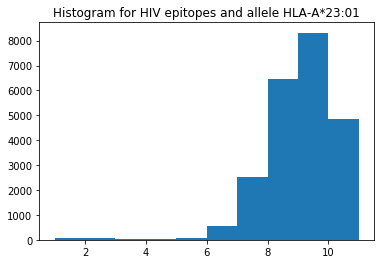

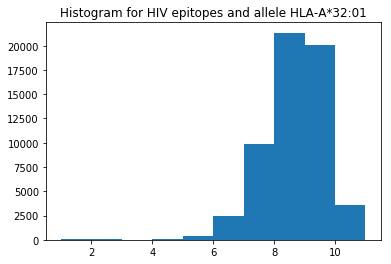

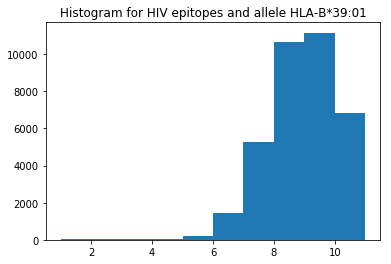

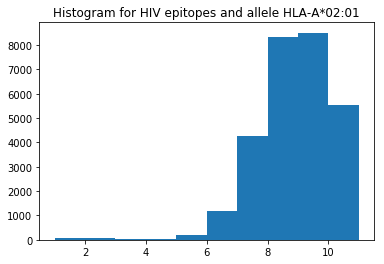

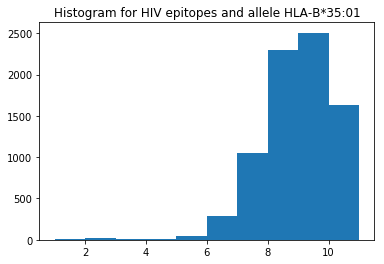

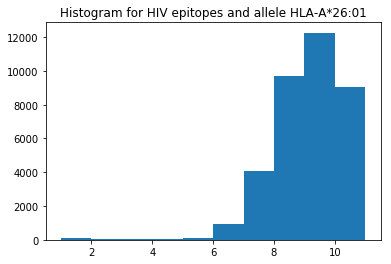

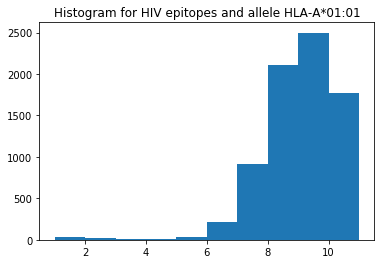

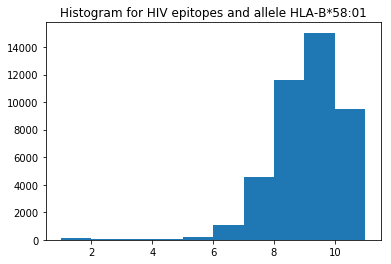

In [0]:
from collections import defaultdict
import itertools
import os
import pickle
from Bio import SeqIO
from mhcflurry import Class1AffinityPredictor
import pandas as pd

binding_epitopes = pickle.load(open('/content/gdrive/My Drive/TCR Epitope Identification/epitope_affinities_HCV.pkl', 'rb'))
for allele in binding_epitopes:
  distances = []
  binding_epitopes_allele = binding_epitopes[allele]
  epitopes = binding_epitopes_allele.loc[binding_epitopes_allele['prediction_percentile'] <= 2, 'peptide'].values
  HIV_peptides = virus_peptides['HIV']
  epitopes_HIV = list(set(epitopes).intersection(set(HIV_peptides)))
  for i in range(len(epitopes_HIV)):
    for j in range(i):
      distances.append(editdistance.eval(epitopes_HIV[i], epitopes_HIV[j]))
  plt.hist(distances)
  plt.title('Histogram for HIV epitopes and allele {}'.format(allele))
  plt.show()

In [0]:
# include column in chart that shows length of proteome 
from IPython.display import display, HTML
from scipy.stats import binom_test 

def encode_data(tcr, epitope):
  epitope = epitope.replace('X', 'A')
  tcr = tcr.replace('*', 'A')
  cdr_encoded = encoder.encode_onehot([tcr], max_peptide_length=20)[0]
  epitope_encoded = encoder.encode_onehot([epitope], max_peptide_length=11)[0]
  combined_encoded = np.concatenate((cdr_encoded, epitope_encoded))
  combined_encoded = combined_encoded.ravel()
  return combined_encoded

def get_binding_epitopes(tcrs, patient_alleles, cutoff):
  combined_epitope_df = pd.concat([epitope_affinities[allele] for allele in epitope_affinities])
  binding_epitopes = combined_epitope_df[combined_epitope_df['prediction_percentile'] <= cutoff]
  patient_binding_epitopes = binding_epitopes['peptide'].unique()
  return patient_binding_epitopes

def make_dataframe(tcrs, virus_binding_peptides, predicted_to_bind_by_virus, cutoffs, background_rate):
  data = []
  for virus in virus_types:
    data.append({'Virus': virus, 'TCRs': len(tcrs), 'Binding Epitopes': len(virus_binding_peptides[virus]),
                 'TCR/Epitope Complexes': len(tcrs) * len(virus_binding_peptides[virus]), 
                 'Binding Prediction': predicted_to_bind_by_virus[virus], 
                 'Background Prediction': background_rate * len(tcrs) * len(virus_binding_peptides[virus])})
  data = pd.DataFrame(data)
  data['Enrichment'] = data['Binding Prediction'] / data['Background Prediction']
  data['Cutoff'] = cutoffs
  # perform a binomial test for each virus 
  background_prob = data['Binding Prediction'].sum() / data['TCR/Epitope Complexes'].sum()
  data['Binomial test p-value'] = data[['Binding Prediction', 'TCR/Epitope Complexes']].apply(lambda x: binom_test(int(x['Binding Prediction']), 
                                                                                                                   n=int(x['TCR/Epitope Complexes']), 
                                                                                                                   p=background_prob, alternative='greater'), axis=1)
  data = data[['Virus', 'TCRs', 'Binding Epitopes', 'TCR/Epitope Complexes', 'Binding Prediction', \
               'Background Prediction', 'Enrichment', 'Cutoff', 'Binomial test p-value']]
  
  return data 

def generate_metric_tables(patient_tcr, pred_func, func_args, log_weighted=False, cutoff=2):
  # create statistics tables for TCRs/epitopes
  binding_by_patient_virus = defaultdict(dict)
  for i in range(len(patient_tcr)):
    tcrs = patient_tcr[i]
    patient_alleles = alleles_by_patient[i]
    patient_binding_epitopes = get_binding_epitopes(tcrs, patient_alleles, cutoff)
    virus_binding_peptides = defaultdict(list)
    data = []
    for epitope in patient_binding_epitopes:
      for virus in peptide_to_virus[epitope]:
        virus_binding_peptides[virus].append(epitope)
    # calculate metric score for each virus  
    predicted_to_bind_by_virus = {}
    binding_scores_by_virus = {}
    total, total_positives = 0, 0
    cutoffs = []
    for virus in virus_types:
      virus_patient_binding_epitopes = virus_binding_peptides[virus]
      encoded_data = []
      for epitope, tcr in itertools.product(virus_patient_binding_epitopes, tcrs):
        encoded_data.append((tcr, epitope))
      encoded_data_orig = np.array(encoded_data) # copy data so we can subset it later 
      bind_pred = pred_func(encoded_data, *func_args)
      binding_scores_by_virus[virus] = bind_pred
      score = 0.909
      cutoffs.append(score)
      # get epitopes that bind to some TCR 
      bind_ind, = np.where(bind_pred > score)
      binding_data = encoded_data_orig[bind_ind]
      epitopes = list(set(binding_data[:, 1]))
      binding_by_patient_virus[i][virus] = epitopes
      predicted_to_bind_by_virus[virus] = len(bind_pred[bind_pred > score])
      if log_weighted:
        num_positives = (bind_pred > score).sum()
        total += len(tcrs) * len(virus_binding_peptides[virus]) * np.log(num_positives)
        total_positives += num_positives * np.log(num_positives)
      else:
        total += len(tcrs) * len(virus_binding_peptides[virus])
        total_positives += (bind_pred > score).sum()

    background_rate = total_positives / total
    data = make_dataframe(tcrs, virus_binding_peptides, predicted_to_bind_by_virus, cutoffs, background_rate)
    print('Patient', i)
    display(data)
    
  pickle.dump(binding_by_patient_virus, open('/content/gdrive/My Drive/TCR Epitope Identification/binding_by_patient_virus.pkl', 'wb'))

In [0]:
generate_metric_tables(patient_tcr, rf_proba, (clf_vdjdb,), log_weighted=True, cutoff=2)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,15,1453,21795,360,388.655838,0.909,9.265171e-01
1,HPV,15,1383,20745,379,369.931882,0.909,3.056191e-01
2,Influenza,15,1923,28845,588,514.373831,0.909,5.740600e-04
3,Japanese Encephalitis Virus,15,2004,30060,490,536.040124,0.909,9.766804e-01
4,HHV8,15,21866,327990,6061,5848.829015,0.909,1.412770e-03
5,Hepatitis A,15,1389,20835,338,371.536792,0.909,9.599243e-01
6,Hepatitis B,15,1078,16170,282,288.348929,0.909,6.380838e-01
7,Hepatitis C,15,1840,27600,610,492.172569,0.909,9.155999e-08
8,Hepatitis E,15,1314,19710,320,351.475410,0.909,9.543921e-01
9,Measles,15,2715,40725,658,726.222024,0.909,9.944098e-01


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,6,1453,8718,175,224.711230,0.909,9.996608e-01
1,HPV,6,1383,8298,213,213.885499,0.909,4.852283e-01
2,Influenza,6,1923,11538,386,297.398276,0.909,1.583418e-07
3,Japanese Encephalitis Virus,6,2004,12024,256,309.925192,0.909,9.989528e-01
4,HHV8,6,21866,131196,3573,3381.648828,0.909,7.577201e-05
5,Hepatitis A,6,1389,8334,202,214.813419,0.909,7.874077e-01
6,Hepatitis B,6,1078,6468,145,166.716246,0.909,9.520358e-01
7,Hepatitis C,6,1840,11040,311,284.562053,0.909,4.570154e-02
8,Hepatitis E,6,1314,7884,217,203.214422,0.909,1.432075e-01
9,Measles,6,2715,16290,348,419.883681,0.909,9.997782e-01


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,70,1453,101710,1742,2099.111273,0.909,1.000000e+00
1,HPV,70,1383,96810,1923,1997.984095,0.909,9.398118e-01
2,Influenza,70,1923,134610,3117,2778.108037,0.909,2.662717e-11
3,Japanese Encephalitis Virus,70,2004,140280,2753,2895.126628,0.909,9.938759e-01
4,HHV8,70,21866,1530620,33487,31589.240946,0.909,4.560607e-30
5,Hepatitis A,70,1389,97230,1879,2006.652139,0.909,9.970939e-01
6,Hepatitis B,70,1078,75460,1509,1557.358536,0.909,8.668797e-01
7,Hepatitis C,70,1840,128800,2666,2658.200098,0.909,3.698478e-01
8,Hepatitis E,70,1314,91980,1942,1898.301592,0.909,1.230904e-01
9,Measles,70,2715,190050,3634,3922.289818,0.909,9.999965e-01


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,26,1453,37778,826,872.944904,0.909,9.350368e-01
1,HPV,26,1383,35958,713,830.889747,0.909,9.999824e-01
2,Influenza,26,1923,49998,1294,1155.315245,0.909,1.438647e-05
3,Japanese Encephalitis Virus,26,2004,52104,1051,1203.979070,0.909,9.999953e-01
4,HHV8,26,21866,568516,13864,13136.829512,0.909,4.201700e-12
5,Hepatitis A,26,1389,36114,843,834.494475,0.909,3.432522e-01
6,Hepatitis B,26,1078,28028,648,647.649420,0.909,4.584836e-01
7,Hepatitis C,26,1840,47840,1221,1105.449845,0.909,1.673331e-04
8,Hepatitis E,26,1314,34164,755,789.435378,0.909,8.744375e-01
9,Measles,26,2715,70590,1459,1631.139309,0.909,9.999887e-01


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,43,1453,62479,1150,1378.574848,0.909,1.000000e+00
1,HPV,43,1383,59469,1252,1312.160368,0.909,9.335614e-01
2,Influenza,43,1923,82689,1856,1824.500642,0.909,1.653255e-01
3,Japanese Encephalitis Virus,43,2004,86172,1906,1901.351683,0.909,3.663999e-01
4,HHV8,43,21866,940238,22267,20745.985975,0.909,3.332487e-30
5,Hepatitis A,43,1389,59727,1203,1317.853038,0.909,9.988867e-01
6,Hepatitis B,43,1078,46354,913,1022.782991,0.909,9.996272e-01
7,Hepatitis C,43,1840,79120,1949,1745.752044,0.909,2.121206e-07
8,Hepatitis E,43,1314,56502,1239,1246.694666,0.909,5.139853e-01
9,Measles,43,2715,116745,2476,2575.933043,0.909,9.583206e-01


In [0]:
generate_metric_tables(patient_tcr, rf_proba, (clf_vdjdb,), cutoff=1)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,15,766,11490,194,204.923806,0.909,7.885236e-01
1,HPV,15,734,11010,208,196.363021,0.909,2.100800e-01
2,Influenza,15,995,14925,283,266.186929,0.909,1.565162e-01
3,Japanese Encephalitis Virus,15,1059,15885,268,283.308500,0.909,8.281353e-01
4,HHV8,15,12009,180135,3310,3212.702337,0.909,4.292909e-02
5,Hepatitis A,15,778,11670,215,208.134101,0.909,3.248316e-01
6,Hepatitis B,15,592,8880,140,158.374534,0.909,9.371485e-01
7,Hepatitis C,15,1001,15015,366,267.792076,0.909,5.317464e-09
8,Hepatitis E,15,698,10470,151,186.732137,0.909,9.970725e-01
9,Measles,15,1437,21555,331,384.432780,0.909,9.977076e-01


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,6,766,4596,91,121.772585,0.909,0.998613
1,HPV,6,734,4404,117,116.685480,0.909,0.501029
2,Influenza,6,995,5970,158,158.177183,0.909,0.516699
3,Japanese Encephalitis Virus,6,1059,6354,145,168.351394,0.909,0.971019
4,HHV8,6,12009,72054,2067,1909.095270,0.909,0.000155
5,Hepatitis A,6,778,4668,120,123.680250,0.909,0.643785
6,Hepatitis B,6,592,3552,84,94.111450,0.909,0.867158
7,Hepatitis C,6,1001,6006,186,159.131016,0.909,0.018871
8,Hepatitis E,6,698,4188,96,110.962486,0.909,0.934205
9,Measles,6,1437,8622,182,228.442827,0.909,0.999427


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,70,766,53620,949,1127.542085,0.909,1.000000e+00
1,HPV,70,734,51380,1032,1080.438499,0.909,9.346232e-01
2,Influenza,70,995,69650,1569,1464.627121,0.909,3.298610e-03
3,Japanese Encephalitis Virus,70,1059,74130,1541,1558.834293,0.909,6.794423e-01
4,HHV8,70,12009,840630,18788,17677.092561,0.909,3.192585e-17
5,Hepatitis A,70,778,54460,1155,1145.205930,0.909,3.889832e-01
6,Hepatitis B,70,592,41440,887,871.416337,0.909,3.013819e-01
7,Hepatitis C,70,1001,70070,1569,1473.459044,0.909,6.552174e-03
8,Hepatitis E,70,698,48860,936,1027.446965,0.909,9.983485e-01
9,Measles,70,1437,100590,1839,2115.245400,0.909,1.000000e+00


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,26,766,19916,456,470.388042,0.909,7.551779e-01
1,HPV,26,734,19084,373,450.737367,0.909,9.999373e-01
2,Influenza,26,995,25870,666,611.013188,0.909,1.369262e-02
3,Japanese Encephalitis Virus,26,1059,27534,602,650.314539,0.909,9.747233e-01
4,HHV8,26,12009,312234,7794,7374.530026,0.909,4.920990e-07
5,Hepatitis A,26,778,20228,504,477.757046,0.909,1.172229e-01
6,Hepatitis B,26,592,15392,376,363.537495,0.909,2.610932e-01
7,Hepatitis C,26,1001,26026,733,614.697690,0.909,1.463727e-06
8,Hepatitis E,26,698,18148,357,428.630357,0.909,9.998538e-01
9,Measles,26,1437,37362,721,882.438142,0.909,1.000000e+00


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,43,766,32938,625,739.238853,0.909,9.999940e-01
1,HPV,43,734,31562,688,708.356812,0.909,7.853413e-01
2,Influenza,43,995,42785,926,960.238458,0.909,8.718937e-01
3,Japanese Encephalitis Virus,43,1059,45537,1015,1022.002540,0.909,5.919653e-01
4,HHV8,43,12009,516387,12546,11589.450897,0.909,3.760425e-19
5,Hepatitis A,43,778,33454,690,750.819618,0.909,9.889491e-01
6,Hepatitis B,43,592,25456,500,571.317756,0.909,9.990251e-01
7,Hepatitis C,43,1001,43043,1161,966.028841,0.909,4.083315e-10
8,Hepatitis E,43,698,30014,597,673.614516,0.909,9.988846e-01
9,Measles,43,1437,61791,1249,1386.796647,0.909,9.999320e-01


In [0]:
generate_metric_tables(patient_tcr, ensemble_proba, (clf_vdjdb, predictor_vdjdb), cutoff=1)

In [0]:
generate_metric_tables(patient_tcr, rf_proba, (clf_vdjdb,), cutoff=0.5)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,15,398,5970,92,107.216558,0.909,9.399964e-01
1,HPV,15,373,5595,123,100.481850,0.909,1.541763e-02
2,Influenza,15,520,7800,159,140.081935,0.909,6.036866e-02
3,Japanese Encephalitis Virus,15,550,8250,174,148.163585,0.909,1.977224e-02
4,HHV8,15,6382,95730,1750,1719.236365,0.909,2.301601e-01
5,Hepatitis A,15,435,6525,121,117.183926,0.909,3.734896e-01
6,Hepatitis B,15,331,4965,78,89.167539,0.909,8.957139e-01
7,Hepatitis C,15,517,7755,195,139.273770,0.909,3.898833e-06
8,Hepatitis E,15,360,5400,74,96.979801,0.909,9.937056e-01
9,Measles,15,764,11460,193,205.812689,0.909,8.251463e-01


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,6,398,2388,47,64.057711,0.909,0.989690
1,HPV,6,373,2238,69,60.033985,0.909,0.134826
2,Influenza,6,520,3120,93,83.693492,0.909,0.164273
3,Japanese Encephalitis Virus,6,550,3300,83,88.521962,0.909,0.738571
4,HHV8,6,6382,38292,1154,1027.176659,0.909,0.000043
5,Hepatitis A,6,435,2610,72,70.012825,0.909,0.421279
6,Hepatitis B,6,331,1986,47,53.274126,0.909,0.826089
7,Hepatitis C,6,517,3102,94,83.210644,0.909,0.127394
8,Hepatitis E,6,360,2160,44,57.941648,0.909,0.976608
9,Measles,6,764,4584,100,122.965053,0.909,0.986180


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,70,398,27860,494,600.395711,0.909,9.999972e-01
1,HPV,70,373,26110,616,562.682412,0.909,1.305575e-02
2,Influenza,70,520,36400,947,784.436607,0.909,6.989788e-09
3,Japanese Encephalitis Virus,70,550,38500,912,829.692565,0.909,2.310152e-03
4,HHV8,70,6382,446740,10384,9627.450821,0.909,7.083906e-15
5,Hepatitis A,70,435,30450,638,656.211393,0.909,7.690088e-01
6,Hepatitis B,70,331,23170,493,499.324071,0.909,6.187465e-01
7,Hepatitis C,70,517,36190,826,779.911011,0.909,5.043131e-02
8,Hepatitis E,70,360,25200,417,543.071497,0.909,1.000000e+00
9,Measles,70,764,53480,1115,1152.518400,0.909,8.715056e-01


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,26,398,10348,214,251.282605,0.909,0.993160
1,HPV,26,373,9698,229,235.498522,0.909,0.674879
2,Influenza,26,520,13520,367,328.308931,0.909,0.017688
3,Japanese Encephalitis Virus,26,550,14300,348,347.249831,0.909,0.491142
4,HHV8,26,6382,165932,4230,4029.360764,0.909,0.000764
5,Hepatitis A,26,435,11310,284,274.643048,0.909,0.291884
6,Hepatitis B,26,331,8606,209,208.981262,0.909,0.509015
7,Hepatitis C,26,517,13442,385,326.414841,0.909,0.000747
8,Hepatitis E,26,360,9360,183,227.290798,0.909,0.999039
9,Measles,26,764,19864,427,482.361583,0.909,0.995583


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Cutoff,Binomial test p-value
0,HIV,43,398,17114,324,394.100958,0.909,9.998936e-01
1,HPV,43,373,16039,388,369.345873,0.909,1.694093e-01
2,Influenza,43,520,22360,517,514.905775,0.909,4.688622e-01
3,Japanese Encephalitis Virus,43,550,23650,594,544.611877,0.909,1.802486e-02
4,HHV8,43,6382,274426,7041,6319.478180,0.909,9.794380e-20
5,Hepatitis A,43,435,18705,396,430.738485,0.909,9.585064e-01
6,Hepatitis B,43,331,14233,287,327.757330,0.909,9.905225e-01
7,Hepatitis C,43,517,22231,633,511.935164,0.909,9.476143e-08
8,Hepatitis E,43,360,15480,279,356.473229,0.909,9.999927e-01
9,Measles,43,764,32852,692,756.515407,0.909,9.922451e-01


## Different Test

We test taking the top x% ranked combined viral and human peptides, and then running the prediction from these 

In [0]:
human_peptide_affinities = pickle.load(open('/content/gdrive/My Drive/TCR Epitope Identification/human_peptide_affinities.pkl', 'rb'))

def get_epitopes_from_combined(tcrs, patient_alleles, cutoff):
  patient_binding_epitopes = set()
  for allele in epitope_affinities:
    human_peptides_df = human_peptide_affinities[allele]
    human_epitopes = human_peptides_df[human_peptides_df['prediction_percentile'] <= cutoff]
    binding_cutoff = human_epitopes['prediction'].max()
    viral_peptides = epitope_affinities[allele]
    viral_epitopes = viral_peptides[viral_peptides['prediction'] <= binding_cutoff]
    patient_binding_epitopes.update(viral_epitopes['peptide'].unique())
  return list(patient_binding_epitopes)

def generate_metric_tables_2(patient_tcr, pred_func, func_args, log_weighted=False, cutoff=2):
  # create statistics tables for TCRs/epitopes
  binding_by_patient_virus = defaultdict(dict)
  for i in range(len(patient_tcr)):
    tcrs = patient_tcr[i]
    patient_alleles = alleles_by_patient[i]
    patient_binding_epitopes = get_epitopes_from_combined(tcrs, patient_alleles, cutoff)
    virus_binding_peptides = defaultdict(list)
    data = []
    for epitope in patient_binding_epitopes:
      for virus in peptide_to_virus[epitope]:
        virus_binding_peptides[virus].append(epitope)
    # calculate metric score for each virus  
    predicted_to_bind_by_virus = {}
    binding_scores_by_virus = {}
    total, total_positives = 0, 0
    cutoffs = []
    for virus in virus_types:
      virus_patient_binding_epitopes = virus_binding_peptides[virus]
      encoded_data = []
      for epitope, tcr in itertools.product(virus_patient_binding_epitopes, tcrs):
        encoded_data.append((tcr, epitope))
      encoded_data_orig = np.array(encoded_data) # copy data so we can subset it later 
      bind_pred = pred_func(encoded_data, *func_args)
      binding_scores_by_virus[virus] = bind_pred
      score = 0.909
      cutoffs.append(score)
      # get epitopes that bind to some TCR 
      bind_ind, = np.where(bind_pred > score)
      binding_data = encoded_data_orig[bind_ind]
      epitopes = list(set(binding_data[:, 1]))
      binding_by_patient_virus[i][virus] = epitopes
      predicted_to_bind_by_virus[virus] = len(bind_pred[bind_pred > score])
      if log_weighted:
        num_positives = (bind_pred > score).sum()
        total += len(tcrs) * len(virus_binding_peptides[virus]) * np.log(num_positives)
        total_positives += num_positives * np.log(num_positives)
      else:
        total += len(tcrs) * len(virus_binding_peptides[virus])
        total_positives += (bind_pred > score).sum()

    background_rate = total_positives / total
    data = make_dataframe(tcrs, virus_binding_peptides, predicted_to_bind_by_virus, cutoffs, background_rate)
    print('Patient', i)
    display(data)

In [20]:
generate_metric_tables_2(patient_tcr, ensemble_proba, (clf_vdjdb, predictor_vdjdb), cutoff=1)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,15,766,11490,730,810.240881,0.900967,0.909,9.985776e-01
1,HPV,15,734,11010,657,776.392698,0.846221,0.909,9.999976e-01
2,Influenza,15,995,14925,833,1052.466940,0.791474,0.909,1.000000e+00
3,Japanese Encephalitis Virus,15,1059,15885,1296,1120.163307,1.156974,0.909,5.325523e-08
4,HHV8,15,12008,180120,12626,12701.530675,0.994053,0.909,7.577468e-01
5,Hepatitis A,15,778,11670,770,822.933949,0.935677,0.909,9.742124e-01
6,Hepatitis B,15,592,8880,810,626.191386,1.293534,0.909,1.459400e-13
7,Hepatitis C,15,1000,15000,1297,1057.755719,1.226181,0.909,8.126921e-14
8,Hepatitis E,15,698,10470,670,738.313492,0.907474,0.909,9.960994e-01
9,Measles,15,1437,21555,1320,1519.994968,0.868424,0.909,1.000000e+00


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,6,766,4596,277,295.370369,0.937806,0.909,8.723954e-01
1,HPV,6,734,4404,230,283.031137,0.812631,0.909,9.996446e-01
2,Influenza,6,995,5970,263,383.672999,0.685480,0.909,1.000000e+00
3,Japanese Encephalitis Virus,6,1059,6354,488,408.351463,1.195049,0.909,4.015861e-05
4,HHV8,6,12008,72048,4664,4630.296857,1.007279,0.909,3.064033e-01
5,Hepatitis A,6,778,4668,303,299.997581,1.010008,0.909,4.372982e-01
6,Hepatitis B,6,592,3552,286,228.275794,1.252870,0.909,7.629393e-05
7,Hepatitis C,6,1000,6000,520,385.601004,1.348544,0.909,8.868068e-12
8,Hepatitis E,6,698,4188,232,269.149501,0.861974,0.909,9.921928e-01
9,Measles,6,1437,8622,525,554.108643,0.947468,0.909,9.040356e-01


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,70,766,53620,4054,4298.296104,0.943164,0.909,9.999567e-01
1,HPV,70,734,51380,3674,4118.732820,0.892022,0.909,1.000000e+00
2,Influenza,70,995,69650,4412,5583.295853,0.790214,0.909,1.000000e+00
3,Japanese Encephalitis Virus,70,1059,74130,7003,5942.422420,1.178476,0.909,1.059778e-44
4,HHV8,70,12008,840560,67639,67381.122209,1.003827,0.909,1.506183e-01
5,Hepatitis A,70,778,54460,4055,4365.632335,0.928846,0.909,9.999997e-01
6,Hepatitis B,70,592,41440,3985,3321.920748,1.199607,0.909,1.106556e-31
7,Hepatitis C,70,1000,70000,6958,5611.352616,1.239986,0.909,1.164785e-73
8,Hepatitis E,70,698,48860,3400,3916.724126,0.868072,0.909,1.000000e+00
9,Measles,70,1437,100590,7134,8063.513709,0.884726,0.909,1.000000e+00


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,26,766,19916,1315,1508.323875,0.871829,0.909,9.999999e-01
1,HPV,26,734,19084,1244,1445.312956,0.860713,0.909,1.000000e+00
2,Influenza,26,995,25870,1467,1959.245764,0.748758,0.909,1.000000e+00
3,Japanese Encephalitis Virus,26,1059,27534,2387,2085.267602,1.144697,0.909,8.981123e-12
4,HHV8,26,12008,312208,24179,23644.847373,1.022591,0.909,1.600423e-04
5,Hepatitis A,26,778,20228,1503,1531.952969,0.981101,0.909,7.826785e-01
6,Hepatitis B,26,592,15392,1495,1165.702002,1.282489,0.909,2.874149e-22
7,Hepatitis C,26,1000,26000,2518,1969.091220,1.278762,0.909,1.971763e-35
8,Hepatitis E,26,698,18148,1120,1374.425672,0.814886,0.909,1.000000e+00
9,Measles,26,1437,37362,2476,2829.584084,0.875040,0.909,1.000000e+00


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,43,766,32938,2645,2951.378904,0.896191,0.909,1.000000e+00
1,HPV,43,734,31562,2525,2828.083701,0.892831,0.909,1.000000e+00
2,Influenza,43,995,42785,2885,3833.710195,0.752535,0.909,1.000000e+00
3,Japanese Encephalitis Virus,43,1059,45537,4768,4080.300599,1.168541,0.909,1.693125e-28
4,HHV8,43,12008,516344,46662,46266.524639,1.008548,0.909,2.725754e-02
5,Hepatitis A,43,778,33454,2745,2997.614604,0.915728,0.909,9.999995e-01
6,Hepatitis B,43,592,25456,2829,2280.961241,1.240267,0.909,1.546439e-31
7,Hepatitis C,43,1000,43000,4874,3852.975070,1.264997,0.909,2.680794e-62
8,Hepatitis E,43,698,30014,2357,2689.376599,0.876411,0.909,1.000000e+00
9,Measles,43,1437,61791,4860,5536.725175,0.877775,0.909,1.000000e+00


In [21]:
generate_metric_tables_2(patient_tcr, ensemble_proba, (clf_vdjdb, predictor_vdjdb), cutoff=0.5)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,15,398,5970,388,435.177053,0.891591,0.909,9.919864e-01
1,HPV,15,373,5595,395,407.841811,0.968513,0.909,7.524598e-01
2,Influenza,15,520,7800,460,568.573034,0.809043,0.909,9.999995e-01
3,Japanese Encephalitis Virus,15,550,8250,699,601.375324,1.162336,0.909,2.865632e-05
4,HHV8,15,6382,95730,6879,6978.140579,0.985793,0.909,8.924678e-01
5,Hepatitis A,15,435,6525,439,475.633211,0.922980,0.909,9.627372e-01
6,Hepatitis B,15,331,4965,426,361.918604,1.177060,0.909,3.477728e-04
7,Hepatitis C,15,517,7755,638,565.292805,1.128619,0.909,9.627800e-04
8,Hepatitis E,15,360,5400,303,393.627485,0.769763,0.909,9.999996e-01
9,Measles,15,764,11460,762,835.364996,0.912176,0.909,9.963895e-01


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,6,398,2388,147,154.968885,0.948578,0.909,7.572341e-01
1,HPV,6,373,2238,142,145.234659,0.977728,0.909,6.214314e-01
2,Influenza,6,520,3120,126,202.471910,0.622309,0.909,1.000000e+00
3,Japanese Encephalitis Virus,6,550,3300,263,214.152982,1.228094,0.909,4.550976e-04
4,HHV8,6,6382,38292,2481,2484.953328,0.998409,0.909,5.356178e-01
5,Hepatitis A,6,435,2610,181,169.375540,1.068631,0.909,1.876553e-01
6,Hepatitis B,6,331,1986,172,128.881158,1.334563,0.909,9.988980e-05
7,Hepatitis C,6,517,3102,242,201.303803,1.202163,0.909,2.144075e-03
8,Hepatitis E,6,360,2160,115,140.172861,0.820416,0.909,9.892321e-01
9,Measles,6,764,4584,310,297.477960,1.042094,0.909,2.342259e-01


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,70,398,27860,2122,2285.584659,0.928428,0.909,9.998524e-01
1,HPV,70,373,26110,2176,2142.017783,1.015865,0.909,2.246962e-01
2,Influenza,70,520,36400,2388,2986.191011,0.799681,0.909,1.000000e+00
3,Japanese Encephalitis Virus,70,550,38500,3614,3158.471262,1.144224,0.909,6.214591e-17
4,HHV8,70,6382,446740,36547,36649.751988,0.997196,0.909,7.130803e-01
5,Hepatitis A,70,435,30450,2385,2498.063634,0.954739,0.909,9.914666e-01
6,Hepatitis B,70,331,23170,2183,1900.825432,1.148448,0.909,2.005583e-11
7,Hepatitis C,70,517,36190,3372,2968.962986,1.135750,0.909,1.966856e-14
8,Hepatitis E,70,360,25200,1719,2067.363008,0.831494,0.909,1.000000e+00
9,Measles,70,764,53480,4273,4387.403717,0.973925,0.909,9.652882e-01


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,26,398,10348,720,805.692005,0.893642,0.909,9.993387e-01
1,HPV,26,373,9698,728,755.083211,0.964132,0.909,8.521886e-01
2,Influenza,26,520,13520,792,1052.662921,0.752378,0.909,1.000000e+00
3,Japanese Encephalitis Virus,26,550,14300,1312,1113.393475,1.178379,0.909,8.163112e-10
4,HHV8,26,6382,165932,13293,12919.413008,1.028917,0.909,3.313715e-04
5,Hepatitis A,26,435,11310,885,880.593021,1.005005,0.909,4.435608e-01
6,Hepatitis B,26,331,8606,799,670.060436,1.192430,0.909,2.419380e-07
7,Hepatitis C,26,517,13442,1207,1046.589866,1.153269,0.909,2.339376e-07
8,Hepatitis E,26,360,9360,534,728.766638,0.732745,0.909,1.000000e+00
9,Measles,26,764,19864,1472,1546.604754,0.951762,0.909,9.772517e-01


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,43,398,17114,1485,1571.111020,0.945191,0.909,9.895179e-01
1,HPV,43,373,16039,1463,1472.423142,0.993600,0.909,6.056144e-01
2,Influenza,43,520,22360,1552,2052.707865,0.756074,0.909,1.000000e+00
3,Japanese Encephalitis Virus,43,550,23650,2494,2171.133319,1.148709,0.909,5.772535e-13
4,HHV8,43,6382,274426,25316,25193.041530,1.004881,0.909,2.090023e-01
5,Hepatitis A,43,435,18705,1657,1717.169080,0.964960,0.909,9.383499e-01
6,Hepatitis B,43,331,14233,1554,1306.627506,1.189321,0.909,1.450809e-12
7,Hepatitis C,43,517,22231,2388,2040.865320,1.170092,0.909,1.869889e-15
8,Hepatitis E,43,360,15480,1095,1421.105445,0.770527,0.909,1.000000e+00
9,Measles,43,764,32852,2908,3015.901556,0.964222,0.909,9.812364e-01


In [26]:
generate_metric_tables_2(patient_tcr, ensemble_proba, (clf_combined, predictor_combined), cutoff=1)

Patient 0


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,15,766,11490,11,8.346511,1.317916,0.909,2.198667e-01
1,HPV,15,734,11010,6,7.997832,0.750203,0.909,8.086651e-01
2,Influenza,15,995,14925,11,10.841748,1.014597,0.909,5.211266e-01
3,Japanese Encephalitis Virus,15,1059,15885,4,11.539107,0.346647,0.909,9.967425e-01
4,HHV8,15,12008,180120,139,130.841919,1.062351,0.909,2.489521e-01
5,Hepatitis A,15,778,11670,3,8.477266,0.353888,0.909,9.905658e-01
6,Hepatitis B,15,592,8880,12,6.450568,1.860301,0.909,3.222542e-02
7,Hepatitis C,15,1000,15000,27,10.896229,2.477921,0.909,2.768479e-05
8,Hepatitis E,15,698,10470,1,7.605568,0.131483,0.909,9.995037e-01
9,Measles,15,1437,21555,18,15.657881,1.149581,0.909,3.090448e-01


Patient 1


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,6,766,4596,4,5.558514,0.719617,0.909,0.805015
1,HPV,6,734,4404,9,5.326305,1.689727,0.909,0.091361
2,Influenza,6,995,5970,7,7.220264,0.969494,0.909,0.582673
3,Japanese Encephalitis Virus,6,1059,6354,4,7.684683,0.520516,0.909,0.947750
4,HHV8,6,12008,72048,81,87.136608,0.929575,0.909,0.758856
5,Hepatitis A,6,778,4668,1,5.645593,0.177129,0.909,0.996479
6,Hepatitis B,6,592,3552,13,4.295875,3.026159,0.909,0.000524
7,Hepatitis C,6,1000,6000,8,7.256546,1.102453,0.909,0.439477
8,Hepatitis E,6,698,4188,0,5.065069,0.000000,0.909,1.000000
9,Measles,6,1437,8622,5,10.427657,0.479494,0.909,0.977931


Patient 2


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,70,766,53620,50,44.485595,1.123959,0.909,2.226725e-01
1,HPV,70,734,51380,19,42.627189,0.445725,0.909,9.999826e-01
2,Influenza,70,995,69650,79,57.784814,1.367141,0.909,4.598516e-03
3,Japanese Encephalitis Virus,70,1059,74130,2,61.501626,0.032519,0.909,1.000000e+00
4,HHV8,70,12008,840560,685,697.366878,0.982266,0.909,6.853197e-01
5,Hepatitis A,70,778,54460,12,45.182498,0.265590,0.909,1.000000e+00
6,Hepatitis B,70,592,41440,59,34.380512,1.716088,0.909,8.400651e-05
7,Hepatitis C,70,1000,70000,109,58.075190,1.876877,0.909,1.610939e-09
8,Hepatitis E,70,698,48860,11,40.536482,0.271360,0.909,1.000000e+00
9,Measles,70,1437,100590,84,83.454048,1.006542,0.909,4.907145e-01


Patient 3


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,26,766,19916,25,19.105209,1.308544,0.909,1.113574e-01
1,HPV,26,734,19084,8,18.307080,0.436989,0.909,9.976327e-01
2,Influenza,26,995,25870,43,24.816818,1.732696,0.909,5.743696e-04
3,Japanese Encephalitis Virus,26,1059,27534,3,26.413075,0.113580,0.909,1.000000e+00
4,HHV8,26,12008,312208,283,299.497838,0.944915,0.909,8.370641e-01
5,Hepatitis A,26,778,20228,13,19.404507,0.669947,0.909,9.492384e-01
6,Hepatitis B,26,592,15392,30,14.765383,2.031779,0.909,3.229539e-04
7,Hepatitis C,26,1000,26000,50,24.941525,2.004689,0.909,6.465447e-06
8,Hepatitis E,26,698,18148,6,17.409185,0.344646,0.909,9.995016e-01
9,Measles,26,1437,37362,37,35.840972,1.032338,0.909,4.452768e-01


Patient 4


,Virus,TCRs,Binding Epitopes,TCR/Epitope Complexes,Binding Prediction,Background Prediction,Enrichment,Cutoff,Binomial test p-value
0,HIV,43,766,32938,36,31.078738,1.158348,0.909,2.104184e-01
1,HPV,43,734,31562,8,29.780410,0.268633,0.909,9.999994e-01
2,Influenza,43,995,42785,62,40.369901,1.535798,0.909,9.322443e-04
3,Japanese Encephalitis Virus,43,1059,45537,11,42.966558,0.256013,0.909,1.000000e+00
4,HHV8,43,12008,516344,468,487.197764,0.960596,0.909,8.136296e-01
5,Hepatitis A,43,778,33454,10,31.565611,0.316800,0.909,9.999977e-01
6,Hepatitis B,43,592,25456,33,24.019077,1.373908,0.909,4.702465e-02
7,Hepatitis C,43,1000,43000,93,40.572765,2.292178,0.909,1.291395e-12
8,Hepatitis E,43,698,30014,8,28.319790,0.282488,0.909,9.999981e-01
9,Measles,43,1437,61791,60,58.303063,1.029105,0.909,4.293362e-01
